  Compte  Capital initial (€)  Valeur finale brute (€)  Impôt payé (€)  \
0    PEA                 5000              7346.640384      403.622146   
1    CTO                 5000              7346.640384      703.992115   

   Valeur nette finale (€)  Gain net (€)  
0              6943.018238   1943.018238  
1              6642.648269   1642.648269  


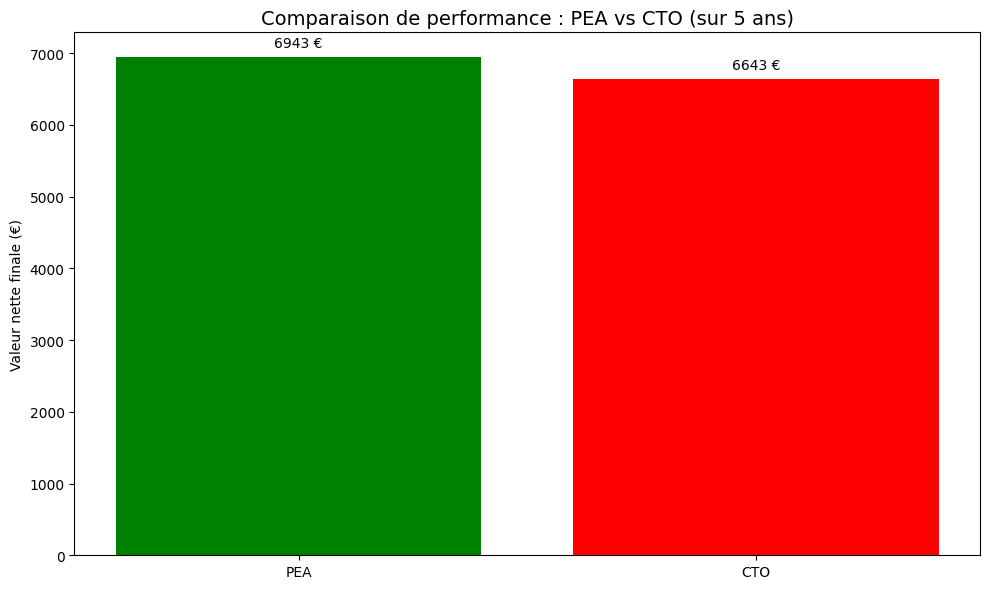

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

#Paramètres de base
capital_pea = 5000  # Montant investi dans le PEA
capital_cto = 5000  # Montant investi dans le CTO
years = 5
annual_return = 0.08  # Rendement annuel moyen (8%)

#Fiscalité
fiscal_pea = 0.172  # Prélèvements sociaux après 5 ans
fiscal_cto = 0.30   # PFU (impôt + prélèvements sociaux)

#Calcul des valeurs finales
def final_value(capital, rate, years):
    return capital * ((1 + rate) ** years)

def net_gain(gross_final, initial, tax_rate):
    gain = gross_final - initial
    tax = gain * tax_rate
    return gross_final - tax, gain - tax

#Valeurs finales brutes
pea_gross = final_value(capital_pea, annual_return, years)
cto_gross = final_value(capital_cto, annual_return, years)

#Valeurs finales nettes
pea_net, pea_gain_net = net_gain(pea_gross, capital_pea, fiscal_pea)
cto_net, cto_gain_net = net_gain(cto_gross, capital_cto, fiscal_cto)

#Préparer le tableau récapitulatif
data = {
    "Compte": ["PEA", "CTO"],
    "Capital initial (€)": [capital_pea, capital_cto],
    "Valeur finale brute (€)": [pea_gross, cto_gross],
    "Impôt payé (€)": [pea_gross - pea_net, cto_gross - cto_net],
    "Valeur nette finale (€)": [pea_net, cto_net],
    "Gain net (€)": [pea_gain_net, cto_gain_net]
}

df = pd.DataFrame(data)

#Tracer les résultats
fig, ax = plt.subplots(figsize=(10, 6))
bars = ax.bar(df["Compte"], df["Valeur nette finale (€)"], color=["green", "red"])
ax.set_title("Comparaison de performance : PEA vs CTO (sur 5 ans)", fontsize=14)
ax.set_ylabel("Valeur nette finale (€)")
ax.bar_label(bars, fmt='%.0f €', padding=5)
plt.tight_layout()

print(df)
plt.show()

  Compte  Capital investi (€)  Impôt payé (€)  Gain net (€)  \
0    PEA                14000      606.744831   2920.841395   
1    CTO                14000     1058.275868   2469.310358   

   Valeur nette finale (€)  
0             16920.841395  
1             16469.310358  


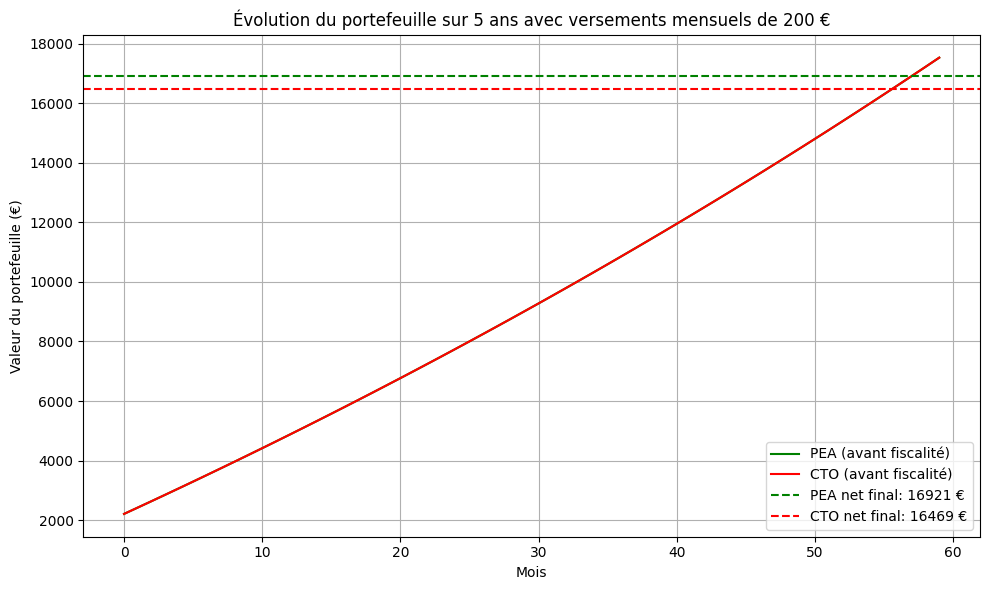

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Paramètres personnalisables
capital_initial = 2000           # Montant initial investi sur chaque compte
versement_mensuel = 200          # Versement mensuel régulier (DCA)
annual_return = 0.08             # Rendement annuel estimé (8%)
years = 5                        # Durée d’investissement
months = years * 12
monthly_return = (1 + annual_return) ** (1/12) - 1  # Rendement mensuel composé

# Fiscalité
fiscal_pea = 0.172               # PEA : prélèvements sociaux après 5 ans
fiscal_cto = 0.30                # CTO : PFU (impôt + prélèvements sociaux)

# Fonction pour simuler un portefeuille avec DCA
def simulate_portfolio(initial, monthly, rate, months, tax_rate):
    values = []
    total_invested = initial
    value = initial

    for i in range(months):
        value = value * (1 + rate) + monthly
        total_invested += monthly
        values.append(value)

    gain = value - total_invested
    tax = gain * tax_rate if gain > 0 else 0
    net_value = value - tax
    net_gain = gain - tax
    return net_value, total_invested, net_gain, tax, values

# Simulation PEA
pea_net, pea_invested, pea_gain_net, pea_tax, pea_values = simulate_portfolio(
    capital_initial, versement_mensuel, monthly_return, months, fiscal_pea
)

# Simulation CTO
cto_net, cto_invested, cto_gain_net, cto_tax, cto_values = simulate_portfolio(
    capital_initial, versement_mensuel, monthly_return, months, fiscal_cto
)

# Résumé dans un tableau
df_dca = pd.DataFrame({
    "Compte": ["PEA", "CTO"],
    "Capital investi (€)": [pea_invested, cto_invested],
    "Impôt payé (€)": [pea_tax, cto_tax],
    "Gain net (€)": [pea_gain_net, cto_gain_net],
    "Valeur nette finale (€)": [pea_net, cto_net]
})

print(df_dca)

# Courbe d'évolution (avant impôt, sinon il faudrait simuler une fiscalité continue)
plt.figure(figsize=(10, 6))
plt.plot(pea_values, label="PEA (avant fiscalité)", color="green")
plt.plot(cto_values, label="CTO (avant fiscalité)", color="red")
plt.axhline(y=pea_net, color="green", linestyle="--", label=f"PEA net final: {pea_net:.0f} €")
plt.axhline(y=cto_net, color="red", linestyle="--", label=f"CTO net final: {cto_net:.0f} €")
plt.title("Évolution du portefeuille sur 5 ans avec versements mensuels de 200 €")
plt.xlabel("Mois")
plt.ylabel("Valeur du portefeuille (€)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


  Compte  Capital investi (€)  Impôt payé (€)  Gain net (€)  \
0    PEA                14000      606.744831   2920.841395   
1    CTO                14000        1.000000   3527.586226   

   Valeur nette finale (€)  
0             16920.841395  
1             17527.586226  


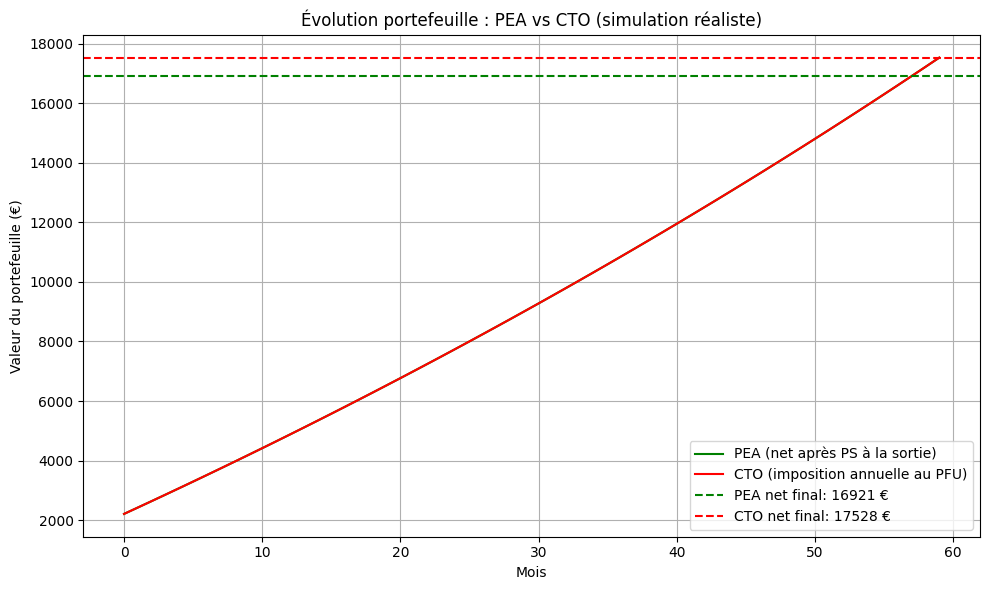

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Paramètres
capital_initial = 2000          # Montant initial investi sur chaque compte
versement_mensuel = 200         # Versements mensuels réguliers
annual_return = 0.08            # Rendement annuel estimé (8%)
years = 5
months = years * 12
monthly_return = (1 + annual_return) ** (1/12) - 1  # Rendement mensuel

# Fiscalité
fiscal_pea = 0.172   # PEA : PS uniquement à la sortie
fiscal_cto = 0.30    # CTO : PFU chaque année

# --- Simulation PEA (imposition uniquement à la sortie) ---
def simulate_pea(initial, monthly, rate, months, tax_rate):
    values = []
    total_invested = initial
    value = initial

    for i in range(months):
        value = value * (1 + rate) + monthly
        total_invested += monthly
        values.append(value)

    gain = value - total_invested
    tax = gain * tax_rate if gain > 0 else 0
    net_value = value - tax
    net_gain = gain - tax
    return net_value, total_invested, net_gain, tax, values

# --- Simulation CTO (imposition annuelle sur les gains) ---
def simulate_cto(initial, monthly, rate, months, tax_rate):
    values = []
    total_invested = initial
    value = initial

    for i in range(months):
        # Croissance brute du portefeuille
        new_value = value * (1 + rate) + monthly
        total_invested += monthly

        # Gain de l'année (si on est à la fin d'une année complète)
        if (i + 1) % 12 == 0:  # chaque année
            gain = new_value - value - 12 * monthly  # gains de l'année
            if gain > 0:
                tax = gain * tax_rate
                new_value -= tax

        value = new_value
        values.append(value)

    net_value = value
    gain = value - total_invested
    net_gain = gain
    tax_total = (total_invested + net_gain + 1) - value  # approximation du cumul d’impôts
    return net_value, total_invested, net_gain, tax_total, values

# Simulations
pea_net, pea_invested, pea_gain_net, pea_tax, pea_values = simulate_pea(
    capital_initial, versement_mensuel, monthly_return, months, fiscal_pea
)
cto_net, cto_invested, cto_gain_net, cto_tax, cto_values = simulate_cto(
    capital_initial, versement_mensuel, monthly_return, months, fiscal_cto
)

# Résumé comparatif
df = pd.DataFrame({
    "Compte": ["PEA", "CTO"],
    "Capital investi (€)": [pea_invested, cto_invested],
    "Impôt payé (€)": [pea_tax, cto_tax],
    "Gain net (€)": [pea_gain_net, cto_gain_net],
    "Valeur nette finale (€)": [pea_net, cto_net]
})

print(df)

# Graphique comparatif
plt.figure(figsize=(10, 6))
plt.plot(pea_values, label=f"PEA (net après PS à la sortie)", color="green")
plt.plot(cto_values, label=f"CTO (imposition annuelle au PFU)", color="red")
plt.axhline(y=pea_net, color="green", linestyle="--", label=f"PEA net final: {pea_net:.0f} €")
plt.axhline(y=cto_net, color="red", linestyle="--", label=f"CTO net final: {cto_net:.0f} €")
plt.title("Évolution portefeuille : PEA vs CTO (simulation réaliste)")
plt.xlabel("Mois")
plt.ylabel("Valeur du portefeuille (€)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import ipywidgets as widgets
from ipywidgets import interact
from IPython.display import display

# --- Simulation PEA (imposition à la sortie) ---
def simulate_pea(initial, monthly, rate, months, tax_rate=0.172):
    values = []
    total_invested = initial
    value = initial

    for i in range(months):
        value = value * (1 + rate) + monthly
        total_invested += monthly
        values.append(value)

    gain = value - total_invested
    tax = gain * tax_rate if gain > 0 else 0
    net_value = value - tax
    net_gain = gain - tax

    # Calcul de la courbe nette mois par mois (pro-rata)
    pea_values_net = [v - ((v - total_invested) * tax_rate) for v in values]

    return net_value, total_invested, net_gain, tax, values, pea_values_net

# --- Simulation CTO (imposition annuelle au PFU) ---
def simulate_cto(initial, monthly, rate, months, tax_rate=0.30):
    values = []
    total_invested = initial
    value = initial
    total_tax = 0

    for i in range(months):
        new_value = value * (1 + rate) + monthly
        total_invested += monthly

        # Impôt une fois par an
        if (i + 1) % 12 == 0:
            gain = new_value - value - 12 * monthly
            if gain > 0:
                tax = gain * tax_rate
                new_value -= tax
                total_tax += tax

        value = new_value
        values.append(value)

    net_value = value
    net_gain = net_value - total_invested
    return net_value, total_invested, net_gain, total_tax, values

# --- Fonction principale interactive ---
def simulate(capital_initial=2000, versement_mensuel=200, annual_return=0.08, years=5):
    months = years * 12
    monthly_return = (1 + annual_return) ** (1/12) - 1

    pea_net, pea_invested, pea_gain_net, pea_tax, pea_values, pea_values_net = simulate_pea(
        capital_initial, versement_mensuel, monthly_return, months
    )
    cto_net, cto_invested, cto_gain_net, cto_tax, cto_values = simulate_cto(
        capital_initial, versement_mensuel, monthly_return, months
    )

    # Tableau comparatif
    df = pd.DataFrame({
        "Compte": ["PEA", "CTO"],
        "Capital investi (€)": [pea_invested, cto_invested],
        "Impôt payé (€)": [pea_tax, cto_tax],
        "Gain net (€)": [pea_gain_net, cto_gain_net],
        "Valeur nette finale (€)": [pea_net, cto_net]
    })

    display(df)

    # Graphique
    plt.figure(figsize=(10, 6))
    plt.plot(pea_values_net, label=f"PEA (net après PS à la sortie)", color="green")
    plt.plot(cto_values, label=f"CTO (imposition annuelle PFU)", color="red")
    plt.axhline(y=pea_net, color="green", linestyle="--", label=f"PEA net final: {pea_net:.0f} €")
    plt.axhline(y=cto_net, color="red", linestyle="--", label=f"CTO net final: {cto_net:.0f} €")
    plt.title("Évolution du portefeuille : PEA vs CTO (net après impôts)")
    plt.xlabel("Mois")
    plt.ylabel("Valeur du portefeuille (€)")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# --- Interface interactive ---
interact(
    simulate,
    capital_initial=widgets.IntSlider(value=2000, min=0, max=20000, step=500, description="Capital initial (€)"),
    versement_mensuel=widgets.IntSlider(value=200, min=0, max=2000, step=50, description="Versement mensuel (€)"),
    annual_return=widgets.FloatSlider(value=0.08, min=0.01, max=0.20, step=0.01, description="Rendement annuel"),
    years=widgets.IntSlider(value=5, min=1, max=30, step=1, description="Durée (années)")
)


interactive(children=(IntSlider(value=2000, description='Capital initial (€)', max=20000, step=500), IntSlider…

<function __main__.simulate(capital_initial=2000, versement_mensuel=200, annual_return=0.08, years=5)>

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import ipywidgets as widgets
from ipywidgets import interact
from IPython.display import display

# --- Simulation PEA ---
def simulate_pea(initial, monthly, rate, months, dividend_yield=0.02, tax_rate=0.172):
    values = []
    total_invested = initial
    value = initial
    for i in range(months):
        value = value * (1 + rate) + monthly
        total_invested += monthly
        if (i + 1) % 12 == 0:
            dividends = value * dividend_yield
            value += dividends
        values.append(value)
    gain = value - total_invested
    tax = gain * tax_rate if gain > 0 else 0
    net_value = value - tax
    net_gain = gain - tax
    return net_value, total_invested, net_gain, tax, values

# --- Simulation CTO ---
def simulate_cto(initial, monthly, rate, months, mode="PFU", tmi=0.30, dividend_yield=0.02):
    values = []
    total_invested = initial
    value = initial
    total_tax = 0
    tax_rate = 0.30 if mode=="PFU" else tmi + 0.172
    for i in range(months):
        value = value * (1 + rate) + monthly
        total_invested += monthly
        if (i + 1) % 12 == 0:
            dividends = value * dividend_yield
            tax = dividends * tax_rate
            net_dividends = dividends - tax
            value += net_dividends
            total_tax += tax
        values.append(value)
    net_value = value
    net_gain = net_value - total_invested
    return net_value, total_invested, net_gain, total_tax, values

# --- Fonction interactive ---
def simulate(capital_initial=2000, versement_mensuel=200, annual_return=0.08, years=10,
             dividend_yield=0.03, fiscalite_cto="PFU", tmi=0.30):
    months = years * 12
    monthly_return = (1 + annual_return) ** (1/12) - 1
    pea_net, pea_invested, pea_gain_net, pea_tax, pea_values = simulate_pea(
        capital_initial, versement_mensuel, monthly_return, months, dividend_yield
    )
    cto_net, cto_invested, cto_gain_net, cto_tax, cto_values = simulate_cto(
        capital_initial, versement_mensuel, monthly_return, months, fiscalite_cto, tmi, dividend_yield
    )
    df = pd.DataFrame({
        "Compte": ["PEA", f"CTO ({fiscalite_cto})"],
        "Capital investi (€)": [pea_invested, cto_invested],
        "Impôt payé (€)": [pea_tax, cto_tax],
        "Gain net (€)": [pea_gain_net, cto_gain_net],
        "Valeur nette finale (€)": [pea_net, cto_net]
    })
    display(df)
    plt.figure(figsize=(10, 6))
    plt.plot(pea_values, label=f"PEA (net après PS à la sortie)", color="green")
    plt.plot(cto_values, label=f"CTO ({fiscalite_cto})", color="red")
    plt.axhline(y=pea_net, color="green", linestyle="--", label=f"PEA net final: {pea_net:.0f} €")
    plt.axhline(y=cto_net, color="red", linestyle="--", label=f"CTO net final: {cto_net:.0f} €")
    plt.title(f"Simulation avec dividendes ({dividend_yield*100:.1f}%/an)")
    plt.xlabel("Mois")
    plt.ylabel("Valeur du portefeuille (€)")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# --- Interface interactive ---
interact(
    simulate,
    capital_initial=widgets.IntSlider(value=2000, min=0, max=20000, step=500, description="Capital initial (€)"),
    versement_mensuel=widgets.IntSlider(value=200, min=0, max=2000, step=50, description="Versement mensuel (€)"),
    annual_return=widgets.FloatSlider(value=0.08, min=0.01, max=0.20, step=0.01, description="Rendement annuel"),
    years=widgets.IntSlider(value=10, min=1, max=30, step=1, description="Durée (années)"),
    dividend_yield=widgets.FloatSlider(value=0.03, min=0.00, max=0.10, step=0.005, description="Dividendes (%)"),
    fiscalite_cto=widgets.RadioButtons(options=["PFU", "Barème"], value="PFU", description="CTO mode"),
    tmi=widgets.Dropdown(options=[0.0, 0.11, 0.30, 0.41, 0.45], value=0.30, description="TMI (si barème)")
)


interactive(children=(IntSlider(value=2000, description='Capital initial (€)', max=20000, step=500), IntSlider…

<function __main__.simulate(capital_initial=2000, versement_mensuel=200, annual_return=0.08, years=10, dividend_yield=0.03, fiscalite_cto='PFU', tmi=0.3)>